# 3. Exploratory Data Analysis (EDA)

* File: `data_exploratory_analysis.ipynb`
* **Purpose**: To understand the distribution of data, identify patterns, and visualize key insights.

* Steps:

    * _Analyze Numerical variables_: Understand the distribution and relationships.
    * _Analyze Categorical variables_: Examine frequency and impact on the target variable.
    * _Correlation Analysis_: Check correlations between features.
    * _Visualizations_: Create visualizations using Matplotlib and other styling libraries like ggplot and viridis.

In [1]:
# Import libraries
import pandas as pd # A library used for data manipulation and analysis. It provides data structures like DataFrame for handling data efficiently.
import matplotlib.pyplot as plt # A library used for creating static, interactive, and animated visualizations in Python. 
import seaborn as sns # A data visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
import os # A library that provides a way to interact with the operating system e.g. create/remove a directory, file, path handling etc.
import warnings
warnings.filterwarnings("ignore") #Ignore all warnings


## 3.1 Numerical and Categorical Feature Analysis

In [2]:
# load data for EDA
df = pd.read_csv('../../data/processed/cleaned_data.csv')

In [3]:
# Ensure the directory exists
save_dir = '../visualization'
os.makedirs(save_dir, exist_ok=True)

-  **`save_dir = 'src/visualization'`**:
    -  This defines the path to the directory where the files will be saved.
-  **`os.makedirs(save_dir, exist_ok=True)`**:
    -  **`os.makedirs()`**: This function creates a directory recursively. If any of the intermediate-level directories do not exist, they will be created as well.
    -  **`exist_ok=True`**: This parameter prevents the function from raising an error if the directory already exists.

In [4]:
# Set styling
plt.style.use('ggplot')

**`plt.style.use('ggplot')`**:
-  **`plt.style.use()`**: This function allows you to apply a specific style to all the plots you generate.
-  **`'ggplot'`**: A predefined style inspired by the ggplot2 package in R, known for its simple and effective visuals.

<Figure size 2000x1500 with 0 Axes>

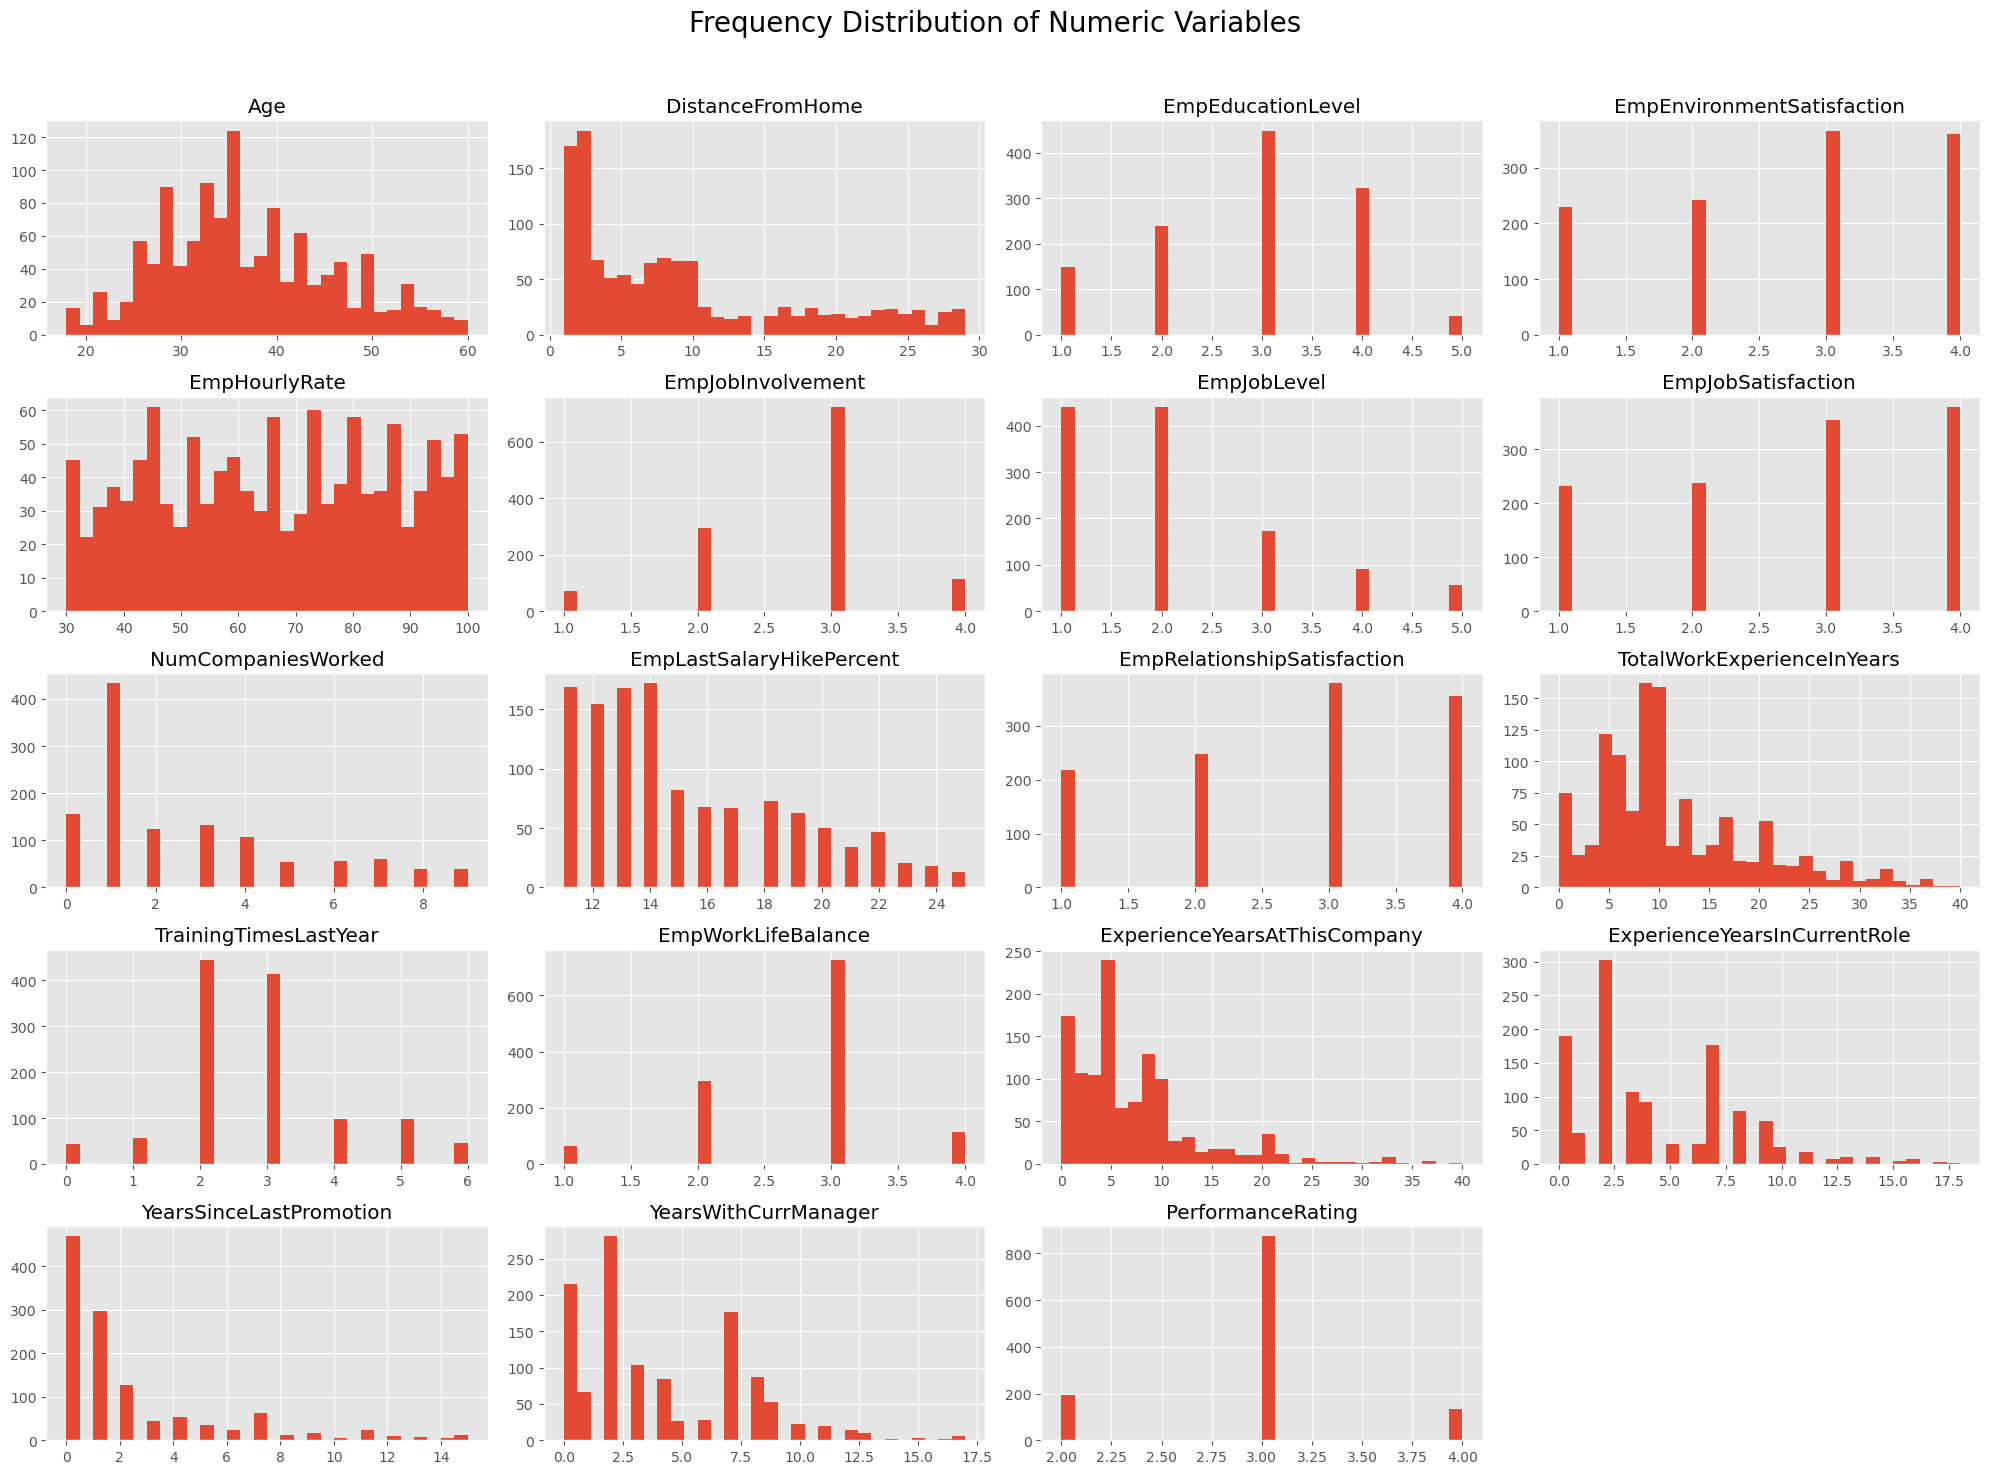

In [5]:
# Frequency distributions for numerical features

# Create a figure with a specified size
plt.figure(figsize=(20, 15))  # Sets the overall size of the figure to 20x15 inches

# Generate histograms for all numeric columns in the DataFrame
df.hist(bins=30, figsize=(20, 15))  # Each numeric column gets its own histogram with 30 bins, size of each subplot is also 20x15 inches

# Add a title to the entire figure
plt.suptitle('Frequency Distribution of Numeric Variables', fontsize=20)  # Adds a main title to the figure with a font size of 20

# Adjust the layout to make space for the main title
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjusts the padding between and around subplots to avoid overlap, reserving space at the top for the title

# Define the file path to save the histogram plot
hist_file = os.path.join(save_dir, 'numerical_features_histograms.png')  # Constructs the path for saving the plot image in the 'save_dir' directory

# Save the figure to the specified file path
plt.savefig(hist_file)  # Saves the figure as an image file at the specified location

# Display the figure
plt.show()  # Renders the figure in the output

# Close the figure to free up memory
plt.close()  # Closes the figure to prevent it from displaying again and to free up system resources


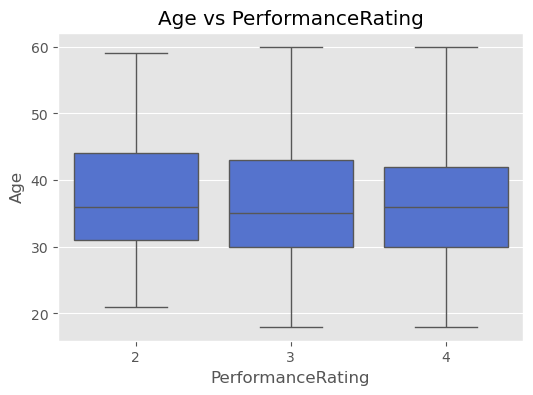

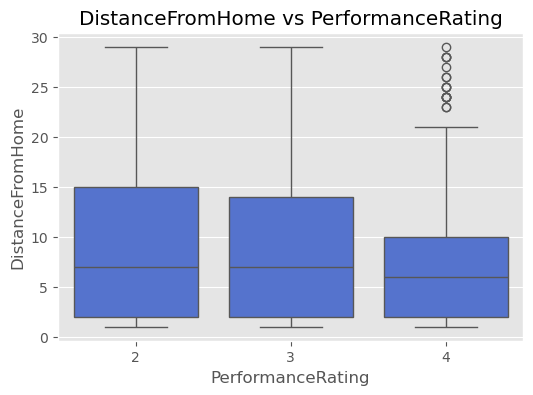

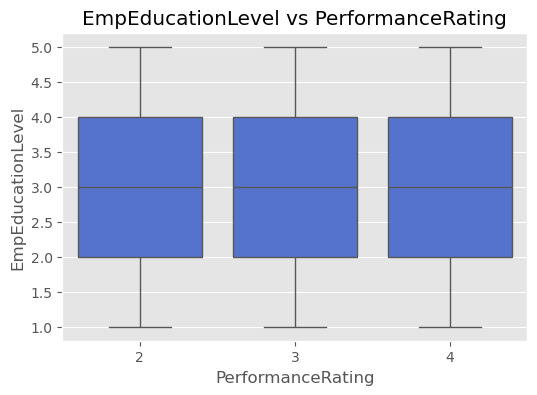

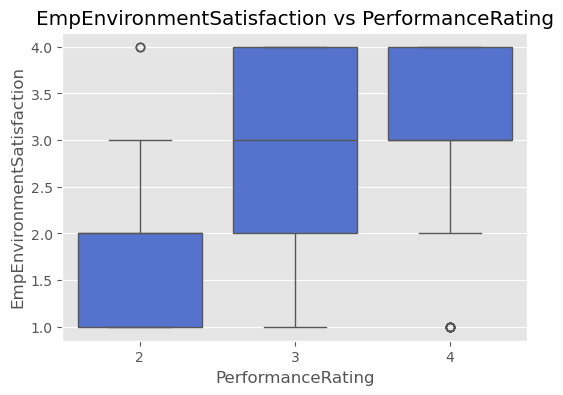

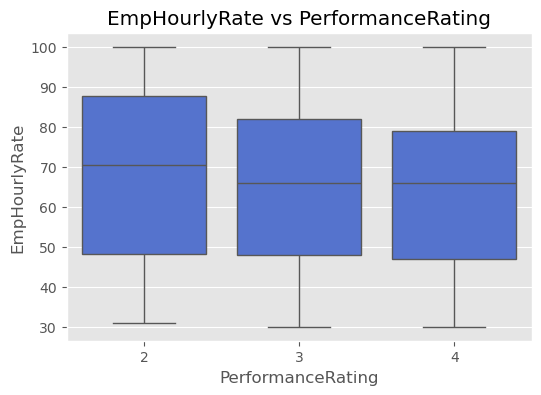

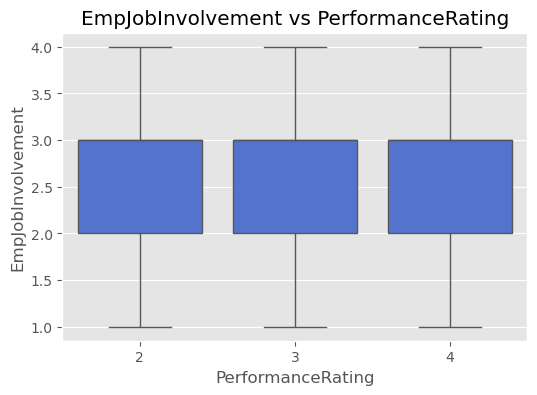

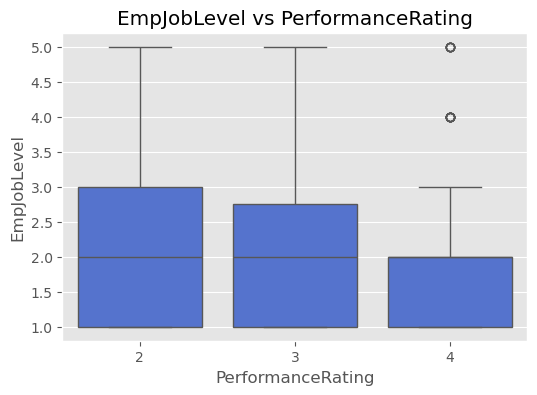

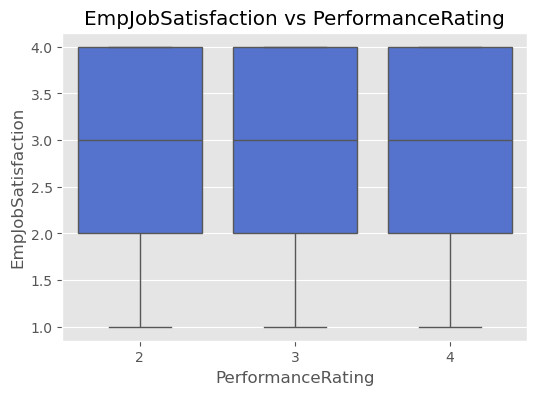

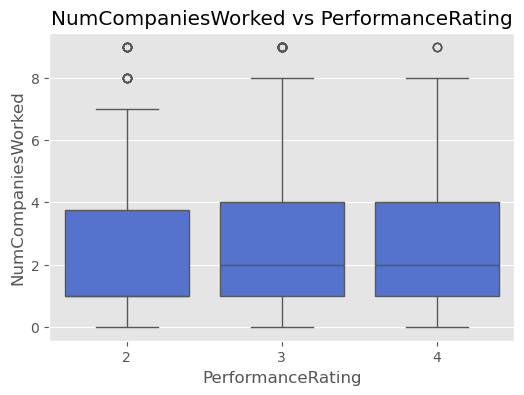

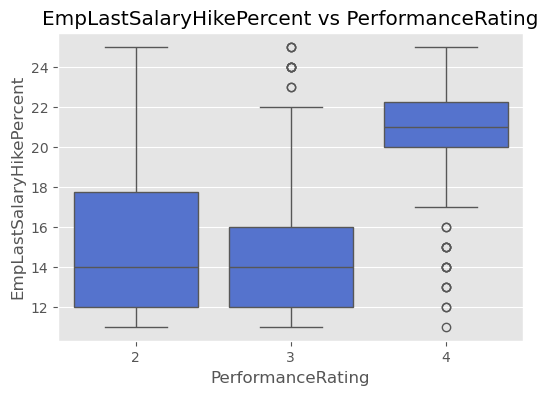

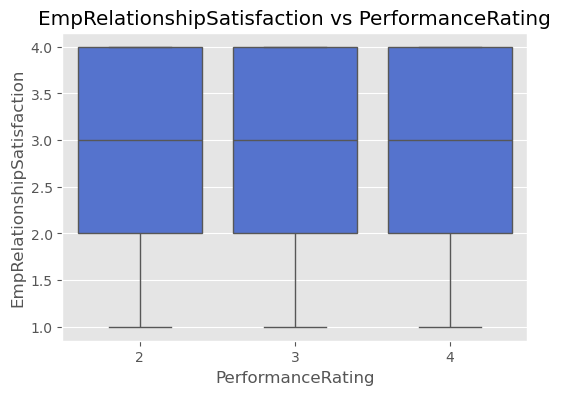

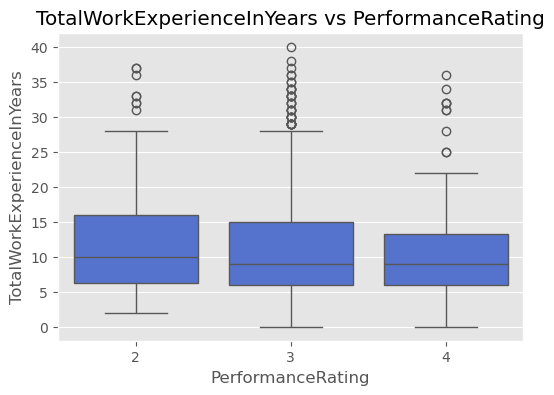

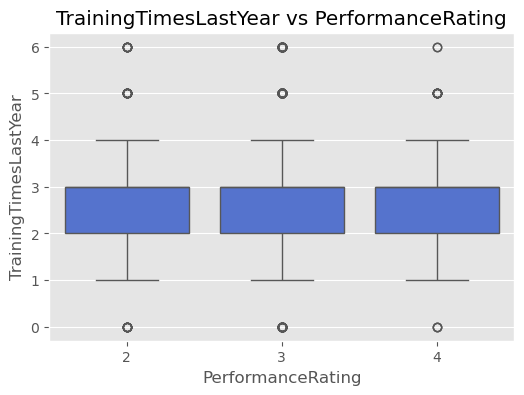

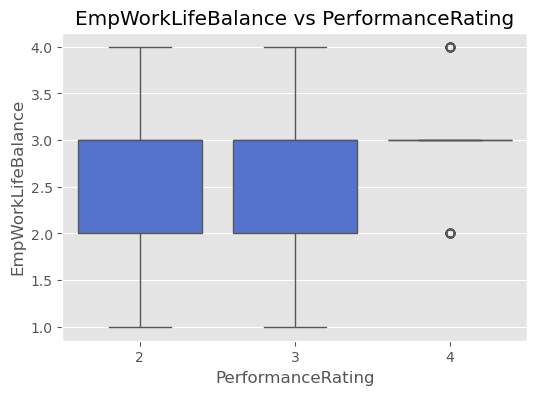

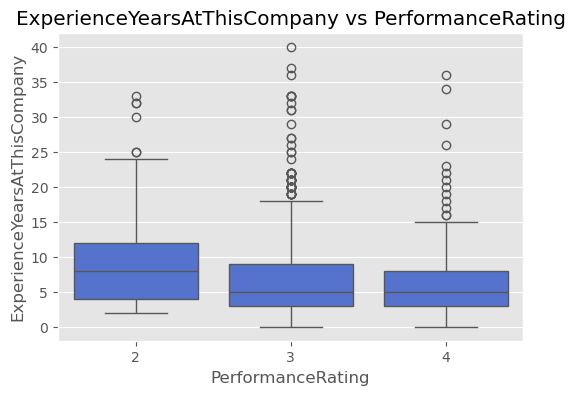

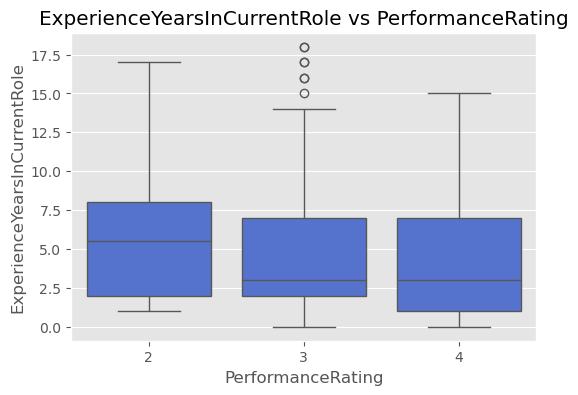

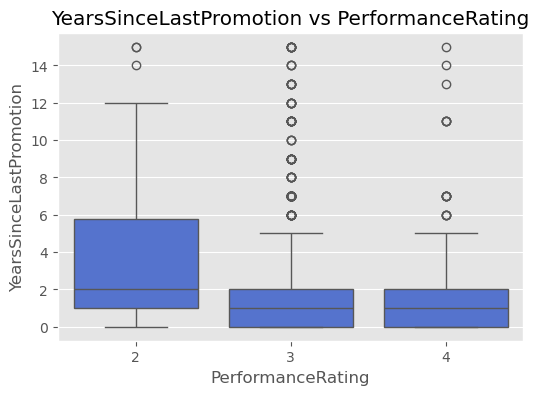

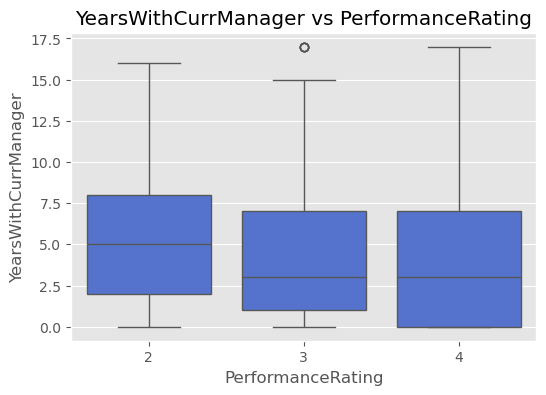

In [6]:
# Use a valid style
plt.style.use('ggplot')

# Get all numerical columns
all_numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Exclude the specific column 'PerformanceRating'
excluded_column = 'PerformanceRating'
numerical_features = [col for col in all_numerical_cols if col != excluded_column]

# Boxplots for numerical features vs. PerformanceRating

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='PerformanceRating', y=feature, data=df, color='royalblue')
    plt.title(f'{feature} vs PerformanceRating')
    plt.savefig(f'{save_dir}/{feature}_vs_PerformanceRating.png')
    plt.show()

#### Explanation of the Boxplots for Numerical Features vs. PerformanceRating
1. **Set the Plotting Style**:
    ```python
    plt.style.use('ggplot')
    ```
    - This line sets the style of the plots to 'ggplot', which is a popular plotting style that provides a clean and aesthetically pleasing look, similar to the ggplot2 package in R.
2. **Get All Numerical Columns**:
    ```python
    all_numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    ```
    - This command selects all columns in the DataFrame `df` that have numerical data types (e.g., integers, floats).
    - The `.select_dtypes(include=['number'])` method filters out non-numeric columns, and `.columns.tolist()` converts the column names to a list.
3. **Exclude 'PerformanceRating' Column**:
    ```python
    excluded_column = 'PerformanceRating'
    numerical_features = [col for col in all_numerical_cols if col != excluded_column]
    ```
    - The `excluded_column` variable is set to `'PerformanceRating'`, indicating that this column should not be included in the analysis.
    - The `numerical_features` list comprehension iterates over all numerical columns and includes only those columns that are not `'PerformanceRating'`.
4. **Create Boxplots for Each Numerical Feature**:
    ```python
    for feature in numerical_features:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='PerformanceRating', y=feature, data=df, color='royalblue')
        plt.title(f'{feature} vs PerformanceRating')
        plt.savefig(f'{save_dir}/{feature}_vs_PerformanceRating.png')
        plt.show()
    ```
    - **Loop Through Numerical Features**:
        - The `for` loop iterates over each numerical feature in the `numerical_features` list.
    - **Create a New Figure**:
        - `plt.figure(figsize=(6, 4))` initializes a new figure with dimensions of 6x4 inches for each plot.
    - **Generate the Boxplot**:
        - `sns.boxplot(x='PerformanceRating', y=feature, data=df, color='royalblue')` creates a boxplot comparing the numerical feature with `PerformanceRating`. The boxplot is colored in 'royalblue'.
    - **Set the Title**:
        - `plt.title(f'{feature} vs PerformanceRating')` sets the title of the plot, indicating which numerical feature is being compared to `PerformanceRating`.
    - **Save the Plot**:
        - `plt.savefig(f'{save_dir}/{feature}_vs_PerformanceRating.png')` saves the plot as a PNG file in the directory specified by `save_dir`, with the filename based on the feature name.
    - **Display the Plot**:
        - `plt.show()` displays the plot in the output. This is useful when running the code in an interactive environment like Jupyter Notebook or a script where you want to see the plots immediately.
#### Outcome:
- The code generates and saves individual boxplots for each numerical feature (except `PerformanceRating`) against `PerformanceRating`.
- These boxplots help visualize the distribution of numerical features across different levels of `PerformanceRating`, allowing for the detection of patterns between numerical variables and performance rating (Target) variable.

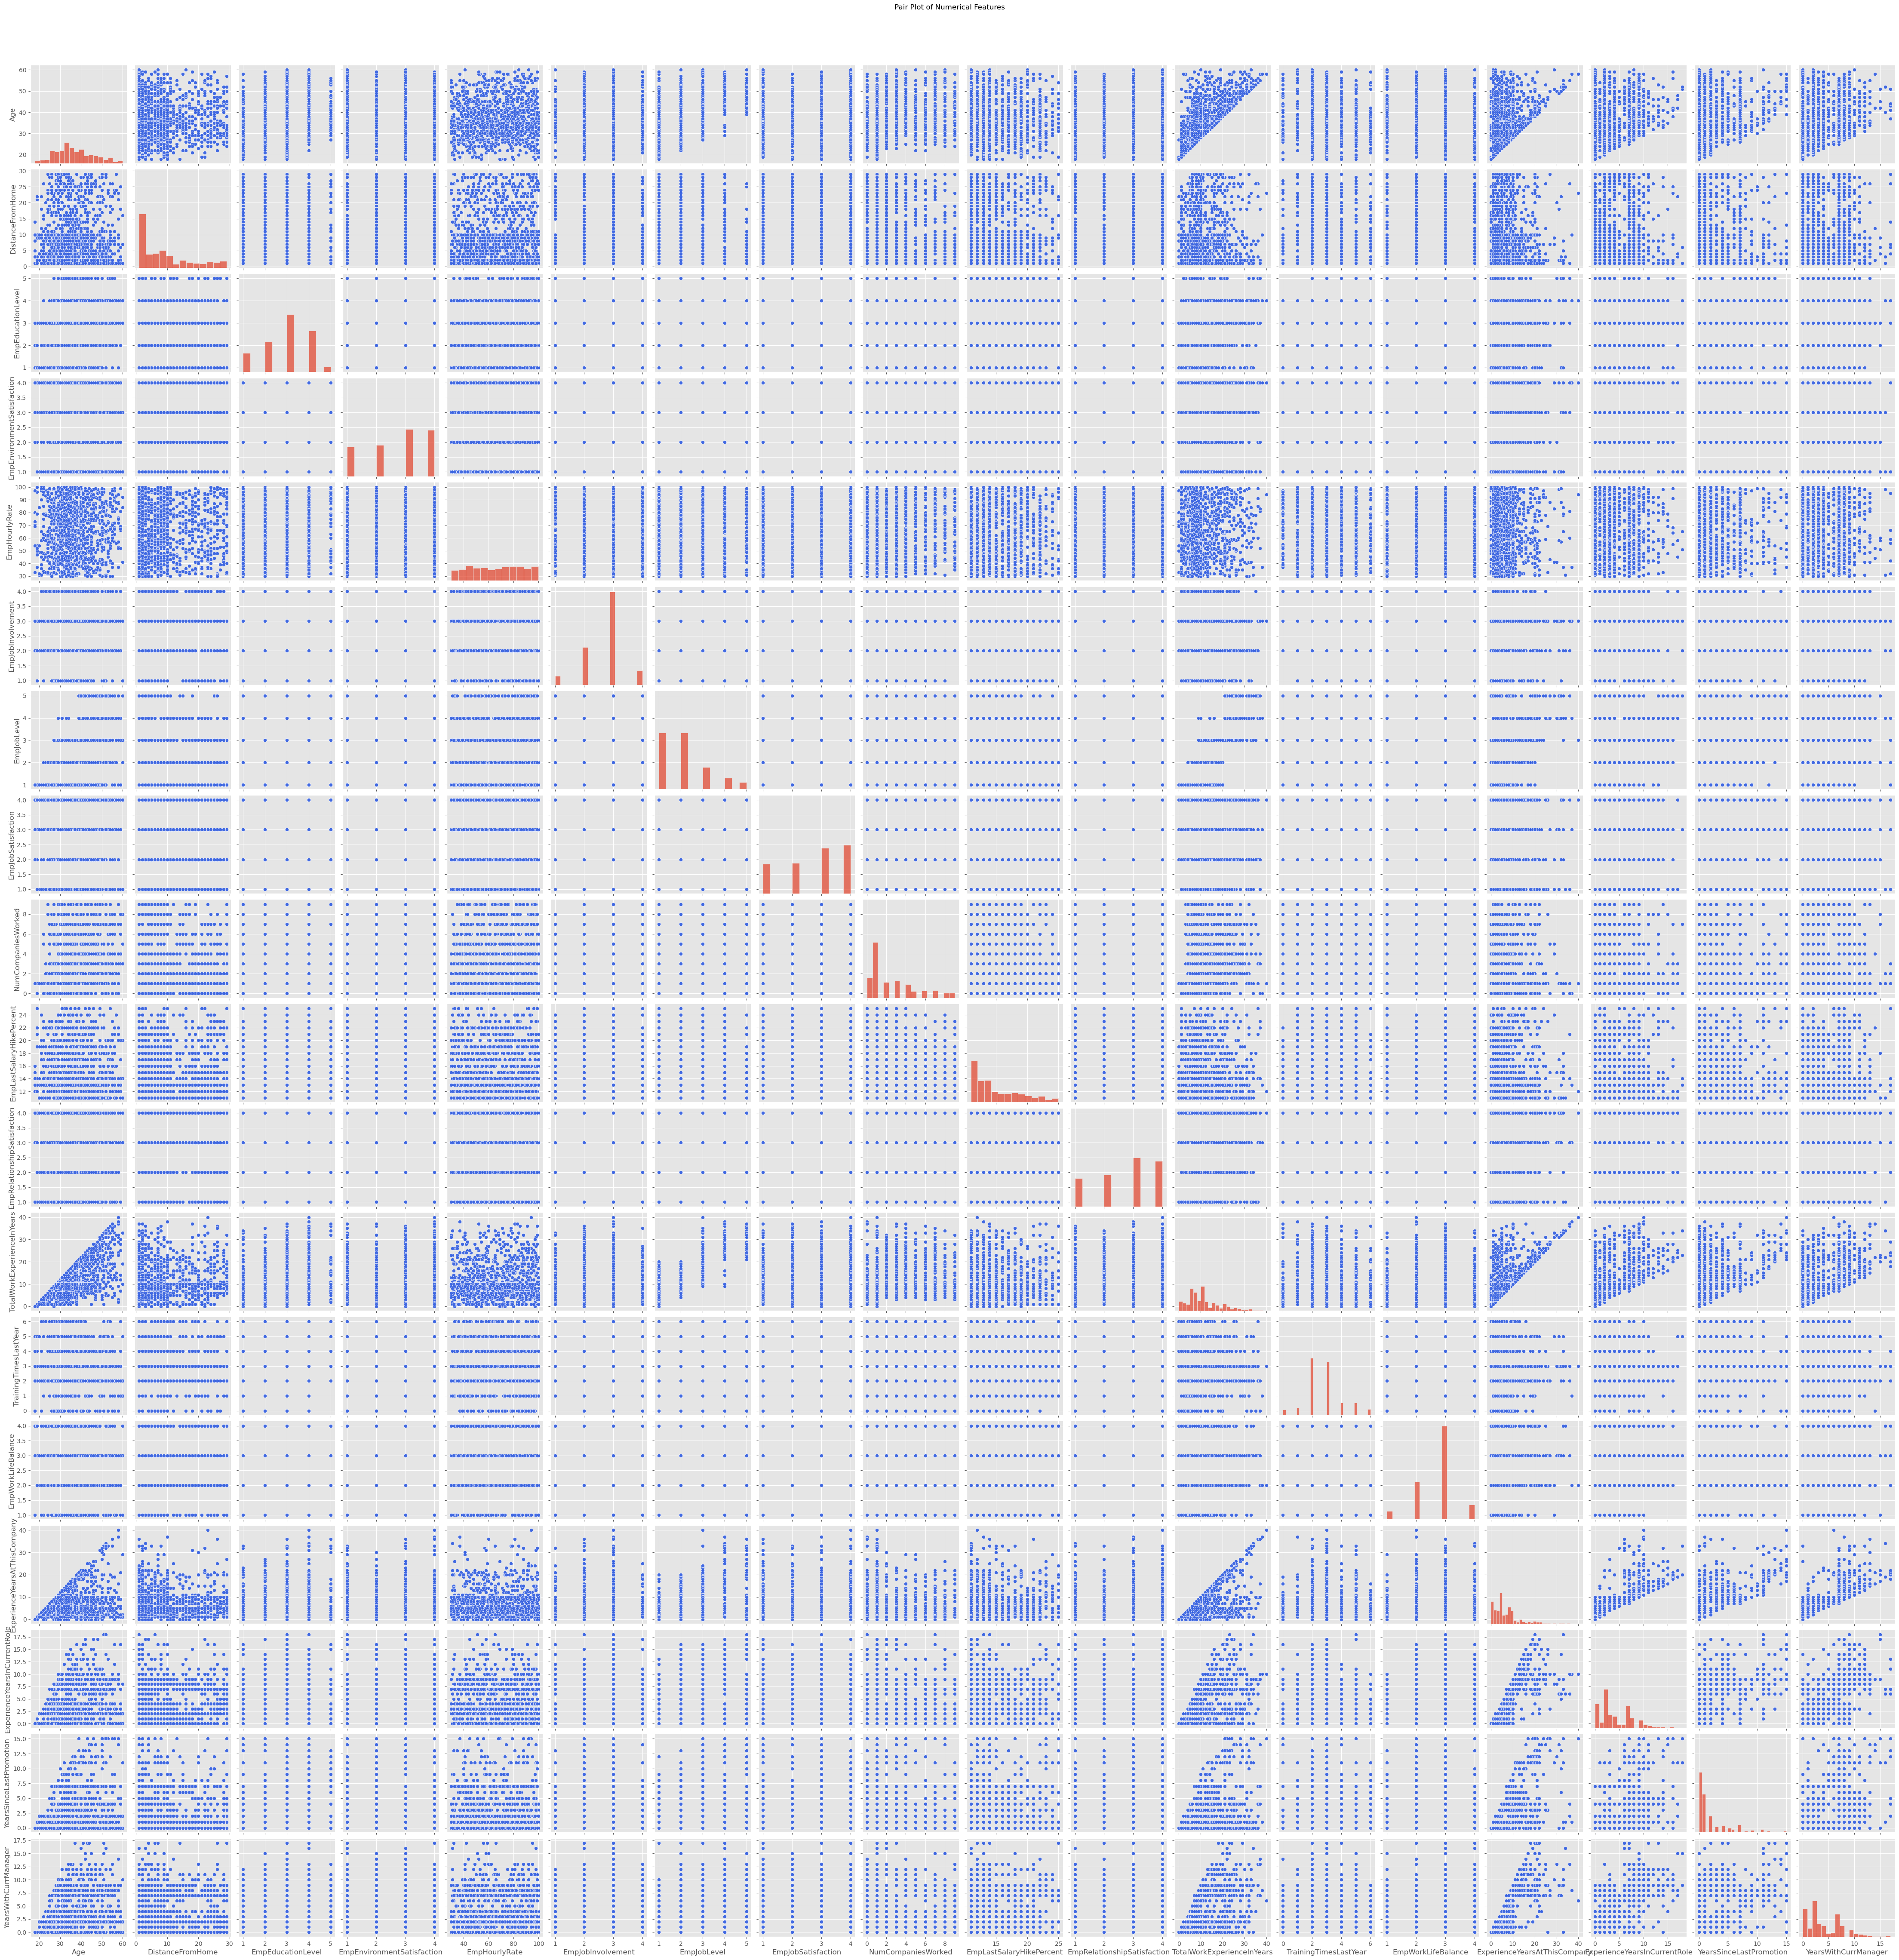

In [7]:
# Pairplot for numerical features
# Create the pair plot

# Select only the numerical features from the DataFrame
numerical_data = df[numerical_features]  # Extracts columns specified in numerical_features from df and stores them in numerical_data.

# Create the pair plot for numerical features
pairplot = sns.pairplot(numerical_data, plot_kws={'color': 'royalblue'})  
# Generates a grid of scatter plots for each pair of numerical features, with points colored 'royalblue'.

# Add a title 
plt.suptitle('Pair Plot of Numerical Features', y=1.02)  
# Adds a title above the pair plot, with y=1.02 adjusting the vertical position slightly above the plot.

# Save the plot
pairplot_path = os.path.join(save_dir, 'pair_plot.png')  
# Constructs the path where the plot will be saved by joining the directory save_dir with the file name 'pair_plot.png'.
pairplot.savefig(pairplot_path)  
# Saves the pair plot to the specified path.

# Show the plot
plt.show()  # Displays the pair plot.



- **Scatter Plot Matrix**:
    - A pairplot creates a matrix of scatter plots, where each subplot represents the relationship between a pair of numerical variables. 
    - Each cell in the matrix shows the scatter plot for one pair of variables, and the diagonal cells typically show histograms or density plots for each individual variable.
- **Visualization of Relationships**:
    - By visualizing the relationships between each pair of numerical variables, a pairplot helps in identifying patterns, trends, and potential correlations or lack thereof.
- **Color and Styling**:
    - Pairplots can include color coding to differentiate between categories or groups within the data, enhancing the interpretability of the plot.

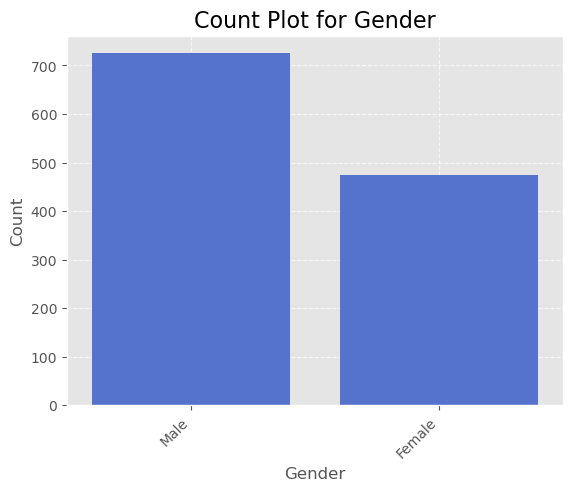

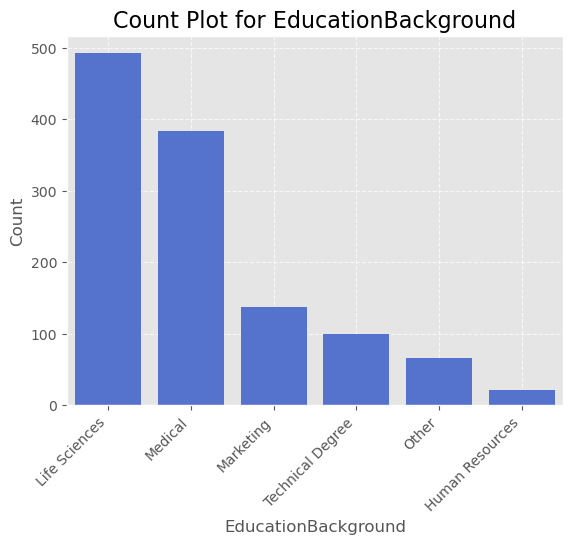

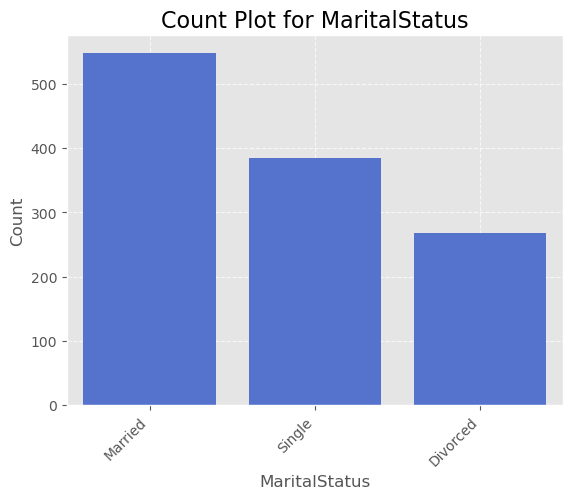

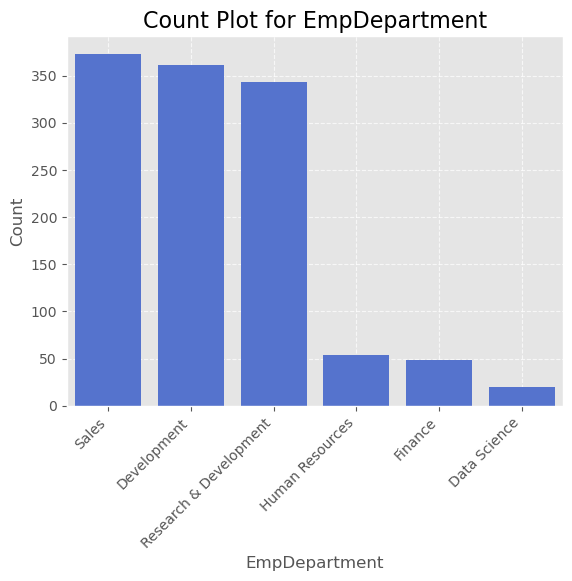

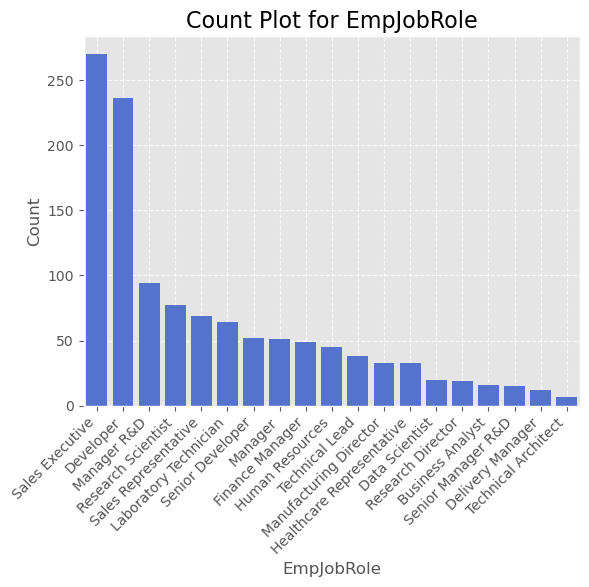

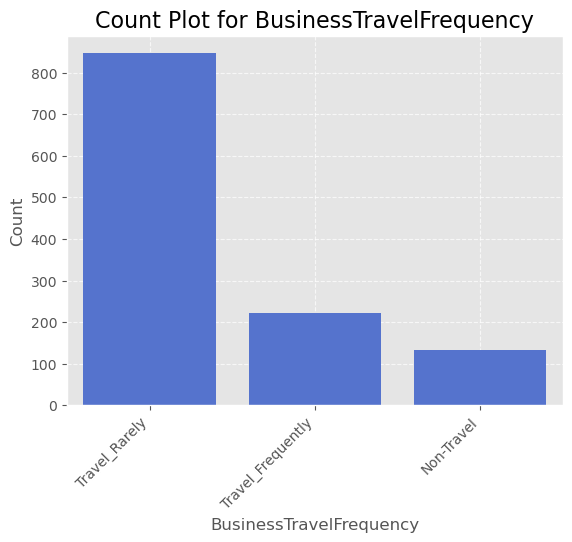

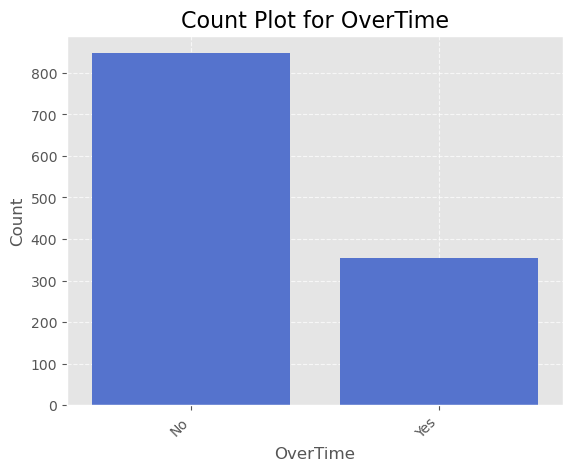

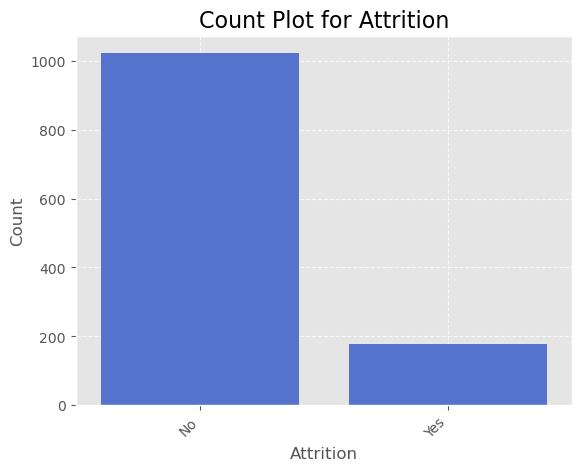

In [8]:
# Frequency plots for categorical features

# Ensure the directory exists
save_dir = '../visualization'
os.makedirs(save_dir, exist_ok=True)  # Creates the directory 'src/visualization' if it does not exist

# Select categorical features from the DataFrame
categorical_features = df.select_dtypes(include=['object']).columns  # Retrieves all categorical columns from the DataFrame

# Iterate through each categorical feature
for col in categorical_features:
    # Get count of each category and sort in descending order
    count_data = df[col].value_counts().sort_values(ascending=False)  # Counts occurrences of each category in the column and sorts them
    
    # Create a DataFrame from the sorted counts
    sorted_data = pd.DataFrame(count_data).reset_index()  # Converts the count data into a DataFrame
    sorted_data.columns = [col, 'Count']  # Renames columns for better clarity
    
    # Create the plot
    # plt.figure(figsize=(10, 6))  # Uncomment to set figure size if needed
    sns.barplot(x=col, y='Count', color='royalblue', data=sorted_data)  # Creates a bar plot of the sorted counts
    
    # Add titles and labels
    plt.title(f'Count Plot for {col}', fontsize=16)  # Sets the title of the plot
    plt.xlabel(col, fontsize=12)  # Labels the x-axis
    plt.ylabel('Count', fontsize=12)  # Labels the y-axis
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45, ha='right')  # Rotates x-axis labels for better readability
    
    # Show grid
    plt.grid(True, linestyle='--', alpha=0.7)  # Adds a grid to the plot for better readability
    
    # Save the plot
    plot_path = os.path.join(save_dir, f'{col}_count_plot.png')  # Defines the path to save the plot
    plt.savefig(plot_path)  # Saves the plot to the specified path
    
    # Show the plot
    plt.show()  # Displays the plot


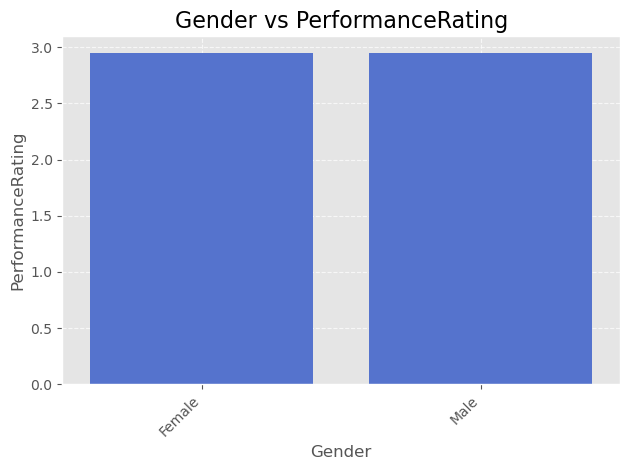

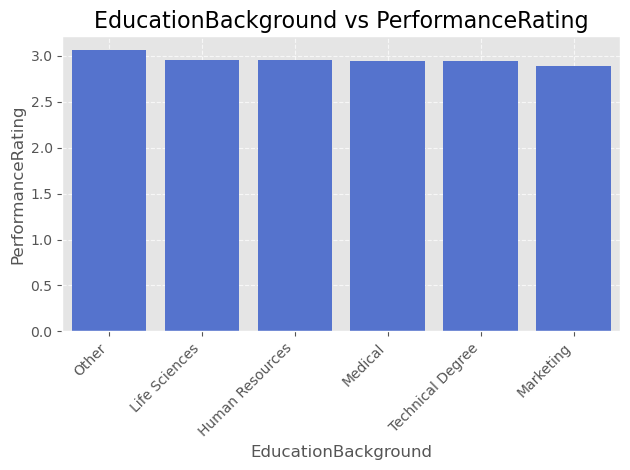

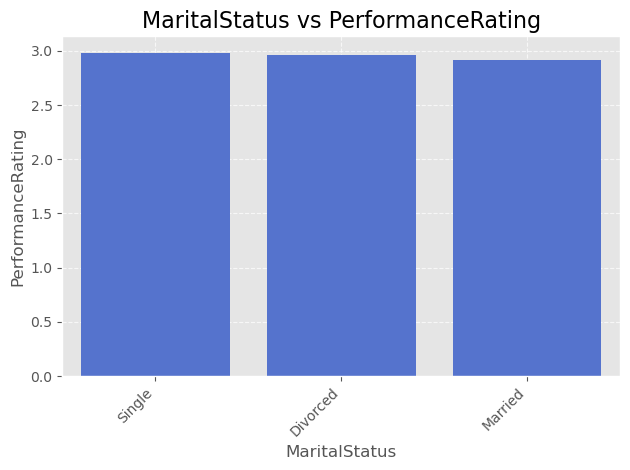

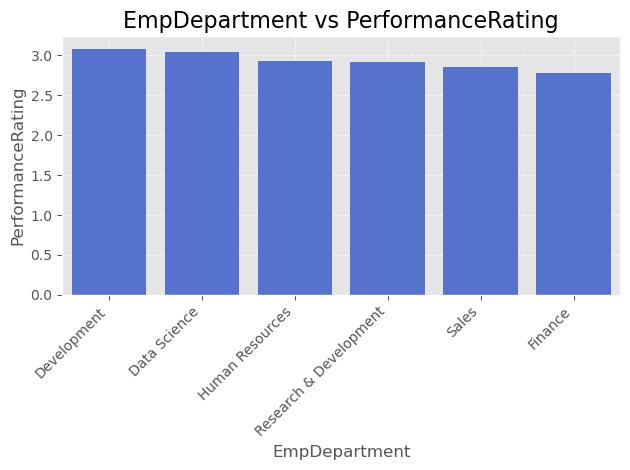

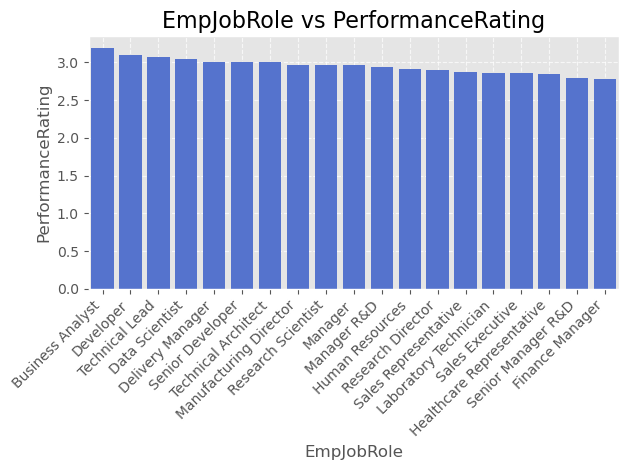

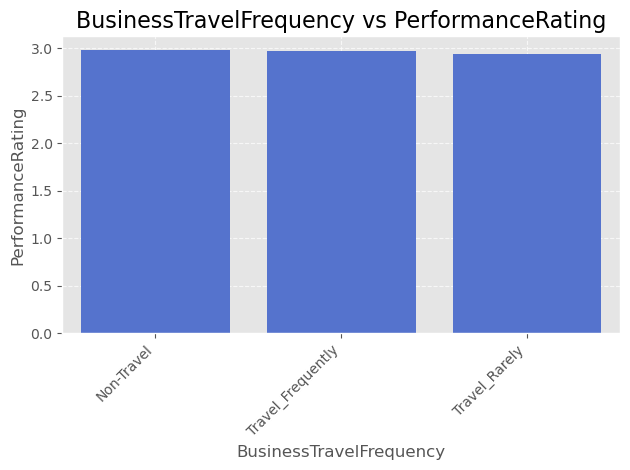

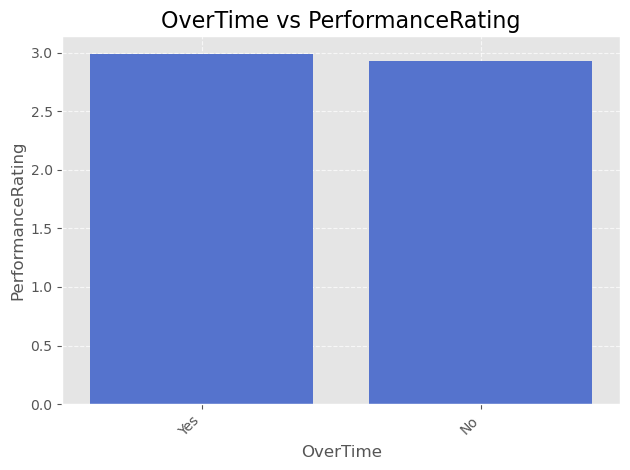

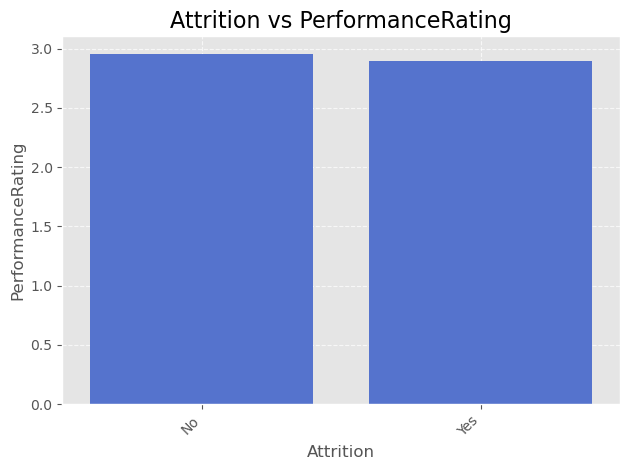

In [9]:
# Frequency plots for categorical features vs Performance Rating

# Ensure the directory exists
save_dir = '../visualization'
os.makedirs(save_dir, exist_ok=True)  # Creates the directory 'src/visualization' if it does not already exist

# Define categorical features and the performance rating column
categorical_features = df.select_dtypes(include=['object']).columns  # Selects all categorical columns from the DataFrame
performance_rating = 'PerformanceRating'  # Defines the column name for the performance rating

# Iterate through each categorical feature
for col in categorical_features:
    # plt.figure(figsize=(10, 6))  # Uncomment to set figure size if needed
    
    # Aggregate the performance rating by the categorical feature
    aggregated_data = df.groupby(col)[performance_rating].mean().reset_index()  # Calculates the mean performance rating for each category
    # Sort the data in descending order of the performance rating
    sorted_data = aggregated_data.sort_values(by=performance_rating, ascending=False)  # Sorts the aggregated data by the mean performance rating
    
    # Create a bar plot with sorted data
    sns.barplot(x=col, y=performance_rating, data=sorted_data, color='royalblue')  # Creates a bar plot with the sorted data
    
    # Add titles and labels
    plt.title(f'{col} vs {performance_rating}', fontsize=16)  # Sets the title of the plot
    plt.xlabel(col, fontsize=12)  # Labels the x-axis
    plt.ylabel(performance_rating, fontsize=12)  # Labels the y-axis
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45, ha='right')  # Rotates x-axis labels for better readability
    
    # Show grid
    plt.grid(True, linestyle='--', alpha=0.7)  # Adds a grid to the plot for better readability
    
    # Adjust layout to fit labels and titles
    plt.tight_layout()  # Adjusts layout to ensure titles and labels fit within the figure
    
    # Save the plot
    plot_path = os.path.join(save_dir, f'{col}_vs_{performance_rating}.png')  # Defines the file path for saving the plot
    plt.savefig(plot_path)  # Saves the plot to the specified path
    
    # Show the plot
    plt.show()  # Displays the plot


## 3.2 Correlation Analysis

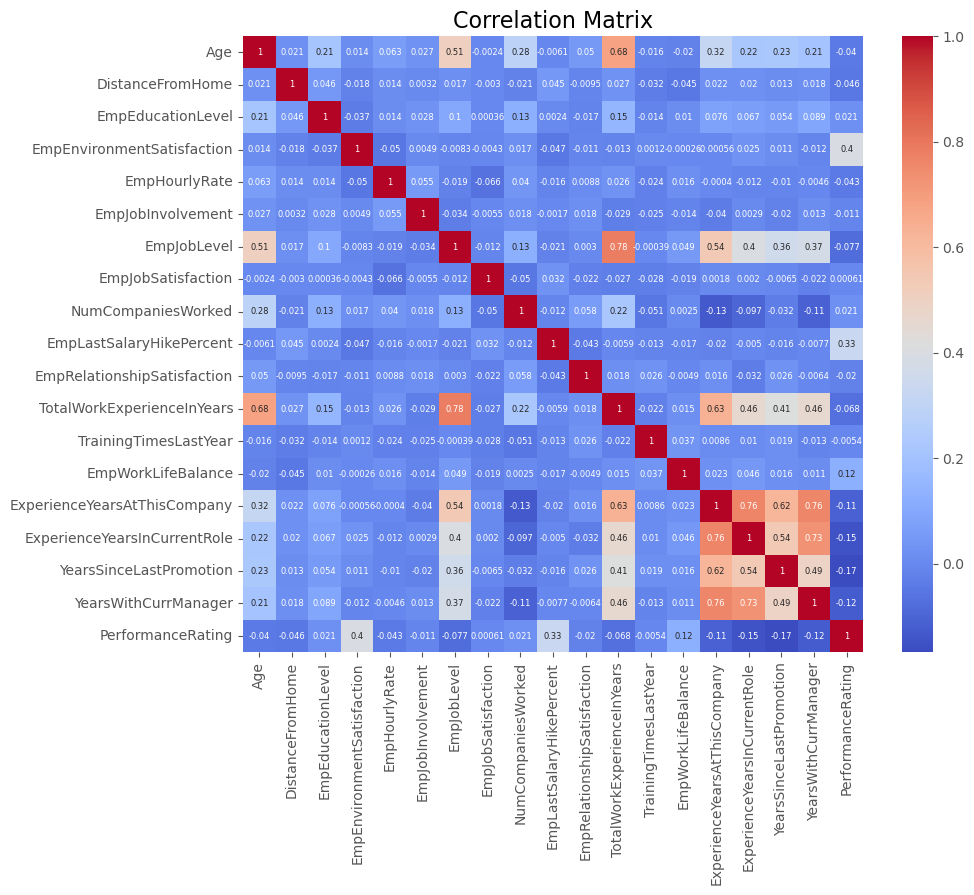

In [10]:
# Correlation Matrix

# Ensure the directory exists
save_dir = '../visualization'
os.makedirs(save_dir, exist_ok=True)  # Creates the directory 'src/visualization' if it doesn't already exist

# Select numerical features for correlation matrix
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
# Selects columns with numerical data types (integer and float) from the DataFrame

# Correlation matrix
corr_matrix = df[numerical_features].corr()  # Calculates the correlation matrix for numerical features

# Create the heatmap
plt.figure(figsize=(10, 8))  # Sets the size of the figure for the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6})
# Creates a heatmap of the correlation matrix
# 'annot=True' adds the correlation values to the heatmap cells
# 'cmap='coolwarm'' sets the color map for the heatmap
# 'annot_kws={"size": 6}' adjusts the font size of the annotations

# Add title
plt.title('Correlation Matrix', fontsize=16)  # Sets the title of the heatmap

# Save the plot
plt.savefig(os.path.join(save_dir, 'correlation_matrix.png'))  # Saves the heatmap to the specified file path

# Show the plot
plt.show()  # Displays the heatmap


# 4. Data Preprocessing and Feature Engineering
* File: `data_exploratory_analysis.ipynb`
* **Purpose**: To further clean and prepare data, particularly focusing on feature engineering and transforming the target variable.

* Steps:

    * _Target Variable Transformation_: Rename PerformanceRating to Target.
    * _Feature Scaling_: Normalize or standardize numerical features.
    * _Encoding Categorical Variables_: Apply label encoding or one-hot encoding to categorical variables.

## 4.1 Feature Engineering

In [11]:
# Import libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# Imports preprocessing tools from scikit-learn:
# - LabelEncoder: Converts categorical labels into numeric labels.
# - OneHotEncoder: Converts categorical features into a one-hot encoded format.
# - StandardScaler: Standardizes features by removing the mean and scaling to unit variance.

from sklearn.compose import ColumnTransformer
# Imports ColumnTransformer from scikit-learn, which allows for different preprocessing steps on different columns of the dataset.

from sklearn.pipeline import Pipeline
# Imports Pipeline from scikit-learn, which helps to chain multiple preprocessing steps together in a single object.

from sklearn.impute import SimpleImputer
# Imports SimpleImputer from scikit-learn, which handles missing values by imputing them with a specified strategy (e.g., mean, median).

import pickle
# Imports the pickle module for serializing and deserializing Python objects, such as saving trained models to disk.


In [12]:
# Rename target variable
df.rename(columns={'PerformanceRating': 'Target'}, inplace=True)

#### Explanation:
- **`df.rename(columns={'PerformanceRating': 'Target'}, inplace=True)`**:
    - **`df.rename()`**: This function is used to rename one or more columns in a DataFrame.
    - **`columns={'PerformanceRating': 'Target'}`**: This argument specifies a dictionary where the keys are the current column names, and the values are the new column names. In this case, it means "PerformanceRating" will be renamed to "Target".
    - **`inplace=True`**: This parameter indicates that the operation should modify the DataFrame in place, meaning that it will not return a new DataFrame but will change the original DataFrame `df` directly.

#### What it does:
- This line of code renames the column `PerformanceRating` to `Target` in the DataFrame `df`.
- This is often done to clarify the role of a column, such as renaming it to reflect its role as the target variable in a machine learning model. In this case, `PerformanceRating` is being renamed to `Target` to indicate that this column will be used as the variable we are trying to predict or analyze.

In [13]:
# Separate features and target
X = df.drop(columns=['Target'], axis = 1)  # Drop the 'Target' column to create the features DataFrame X
y = df['Target']  # Extract the 'Target' column to create the target variable y


In [14]:
# Define numerical features in X
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()  # Identify numerical columns in X and convert to list

In [15]:
# Define categorical features in X
categorical_features = X.select_dtypes(include=['object']).columns.tolist()  # Identify categorical columns in X and convert to list


In [16]:
# Encode categorical features
label_encoders = {}  # Initialize a dictionary to store LabelEncoder objects for each categorical feature

# Loop through each categorical feature
for col in categorical_features:
    le = LabelEncoder()  # Create a new LabelEncoder object for the current feature
    X[col] = le.fit_transform(X[col])  # Fit and transform the categorical data into numeric labels
    label_encoders[col] = le  # Store the LabelEncoder object in the dictionary for later use


In [17]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Step 1: Impute missing values in numerical features with the median
            ('scaler', StandardScaler())  # Step 2: Scale numerical features to standardize them (mean = 0, variance = 1)
        ]), numerical_features),  # Apply this pipeline to numerical features
        
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Apply one-hot encoding to categorical features
    ])


In [18]:
# Apply the preprocessing pipeline to the dataset
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


- **`pipeline = Pipeline(steps=[ ... ])`**:
    - **`Pipeline`**: A scikit-learn class that helps in chaining multiple data processing steps together into a single workflow. It ensures that the transformations are applied in the correct sequence.
    - **`steps=[('preprocessor', preprocessor)]`**:
    - **`steps`**: A list of tuples, where each tuple represents a step in the pipeline. Each tuple contains:
        - **`'preprocessor'`**: A name (identifier) for this step. It's a string label that helps you identify the step in the pipeline.
        - **`preprocessor`**: The preprocessing object (defined earlier) that performs specific transformations on the dataset.

In [19]:
# Transform data
X_transformed = pipeline.fit_transform(X)

- **`X_transformed = pipeline.fit_transform(X)`**:
    - **`pipeline`**: This is the `Pipeline` object created earlier, which contains the preprocessing steps defined.
    - **`fit_transform(X)`**: This method is used to perform both fitting and transforming on the data:
        - **`fit`**: The `fit` method learns the parameters (such as the mean and standard deviation for scaling, or the encoding for categorical variables) from the training data.
        - **`transform`**: The `transform` method applies the learned parameters to the data, resulting in a processed dataset.
    - **`X`**: This is the input dataset that you want to preprocess. In this case, `X` contains the feature variables with both numerical and categorical data.
        - **`X_transformed`**: This variable stores the output of the `fit_transform` method, which is the preprocessed version of the original dataset `X`.
- The pipeline.fit_transform(X) call processes the data X by applying the transformations defined in the pipeline.
- The resulting X_transformed contains the processed features, ready for use in training a machine learning model or further analysis.

## 4.2 Saving the label encoders and preprocessor

In [20]:
# Save the label encoders
with open('../../data/processed/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

- **`with open('data/processed/label_encoders.pkl', 'wb') as f:`**
    - **`open('data/processed/label_encoders.pkl', 'wb')`**: This line opens a file named `label_encoders.pkl` located in the `data/processed/` directory in write-binary mode (`'wb'`). If the directory or file doesn't exist, it will be created.
    - **`as f`**: This creates a file object named `f` that will be used to write data to the file.
- **`pickle.dump(label_encoders, f)`**
    - **`pickle.dump`**: This function serializes (converts to a byte stream) the Python object `label_encoders` and writes it to the file object `f`.
    - **`label_encoders`**: This is a dictionary containing `LabelEncoder` instances for each categorical feature.
    - Each encoder is used to transform categorical values into numeric values.
* The code saves the label_encoders dictionary to a file using Python's pickle module.
* This allows you to reload the label encoders later, preserving the encoding scheme used for categorical features and ensuring consistent preprocessing for future data.

In [21]:
# Save the preprocessor
with open('../../data/processed/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

- **`with open('data/processed/preprocessor.pkl', 'wb') as f:`**
    - **`open('data/processed/preprocessor.pkl', 'wb')`**: This opens a file named `preprocessor.pkl` in the `data/processed/` directory in write-binary mode (`'wb'`). If the file or directory does not exist, it will be created.
    - **`as f`**: This creates a file object named `f` that you will use to write data to the file.
- **`pickle.dump(preprocessor, f)`**
    - **`pickle.dump`**: This function serializes (converts to a byte stream) the Python object `preprocessor` and writes it to the file object `f`.
    - **`preprocessor`**: This is an instance of `ColumnTransformer` that contains the preprocessing steps for the dataset, including numerical imputation, scaling, and categorical one-hot encoding.
#### Summary:
- The code saves the `preprocessor` object to a file using Python's `pickle` module.
- This allows you to reload the `preprocessor` later, ensuring that the same data preprocessing steps are applied consistently to new or additional data, maintaining the integrity of your data transformations.

In [22]:
# Save transformed data
# pd.DataFrame(X_transformed).to_csv('../../data/processed/transformed_data.csv', index=False)  
# Commented out because opted to use feature selection based on correlation score (5.3 below)

- **`pd.DataFrame(X_transformed)`**
    - **`pd.DataFrame`**: This function from the `pandas` library creates a new DataFrame.
    - **`X_transformed`**: This is the transformed version of the feature data obtained from applying the preprocessing pipeline. It's likely in a NumPy array format after transformation.
- **`.to_csv('data/processed/transformed_data.csv', index=False)`**
    - **`.to_csv`**: This method writes the DataFrame to a CSV file.
    - **`'data/processed/transformed_data.csv'`**: The path where the CSV file will be saved. 
        - This specifies that the file will be placed in the `data/processed/` directory and named `transformed_data.csv`.
    - **`index=False`**: This parameter ensures that the DataFrame's index is not written to the CSV file. The resulting CSV will only contain the data without any index column.
#### Summary:
- The code saves the transformed feature data (`X_transformed`) to a CSV file.
- This allows you to store the preprocessed data in a format that can be easily loaded and used for further analysis or modeling.

# 5. Feature Selection and PCA
* File: `data_exploratory_analysis.ipynb`
* **Purpose**: To select the most important features for the model and reduce dimensionality.

* Steps:

    * _Feature Importance_: Use algorithms like Random Forest to determine feature importance.
    * _Principal Component Analysis (PCA)_: Reduce the dimensionality if needed.
    * _Saving Components_: Save selected features for later use.

## 5.1 Feature Importance

In [23]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import pickle
import pandas as pd

- **`import matplotlib.pyplot as plt`**
    - **`import matplotlib.pyplot`**: Imports the `pyplot` module from the `matplotlib` library, which is used for creating visualizations.
    - **`as plt`**: Aliases `pyplot` as `plt` for convenience, allowing you to call functions like `plt.plot()` or `plt.show()`.
- **`from sklearn.ensemble import RandomForestClassifier`**
    - **`from sklearn.ensemble`**: Imports modules from the `ensemble` subpackage of `scikit-learn`, which contains ensemble methods.
    - **`import RandomForestClassifier`**: Specifically imports the `RandomForestClassifier` class, which is used for classification tasks using the Random Forest algorithm.
- **`from sklearn.decomposition import PCA`**
    - **`from sklearn.decomposition`**: Imports modules from the `decomposition` subpackage of `scikit-learn`, which includes methods for dimensionality reduction.
    - **`import PCA`**: Specifically imports the `PCA` class, which performs Principal Component Analysis to reduce the number of features while retaining as much variance as possible.
-   **`from sklearn.feature_selection import SelectKBest, f_classif`**
    - **`from sklearn.feature_selection`**: Imports modules from the `feature_selection` subpackage of `scikit-learn`, which includes methods for selecting the best features.
    - **`import SelectKBest`**: Imports the `SelectKBest` class, which selects the top `k` features based on statistical tests.
    - **`import f_classif`**: Imports the `f_classif` function, which is a statistical test used by `SelectKBest` to evaluate the importance of features for classification tasks.
- **`import pickle`**
    - **`import pickle`**: Imports the `pickle` module, which is used for serializing and deserializing Python objects, such as saving trained models to files.
- **`import pandas as pd`**
    - **`import pandas`**: Imports the `pandas` library, which provides data structures and functions for data manipulation and analysis.
    - **`as pd`**: Aliases `pandas` as `pd` for convenience, allowing you to use functions like `pd.read_csv()` or `pd.DataFrame()`.

In [24]:
# Feature Selection using ANOVA F-test

# Initialize SelectKBest with ANOVA F-test and specify to select all features (k='all')
selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to the data and transform X to get the scores of all features
X_new = selector.fit_transform(X, y)  # `X_new` will be the transformed data with all features, but the transformation here is primarily for scoring

# Get the scores of all features as determined by the ANOVA F-test
feature_scores = selector.scores_

# Get the column names of the original features
features = X.columns


In [25]:
# Create a DataFrame for feature importance

# Create a DataFrame using a dictionary with 'Feature' as column names and 'Score' as column scores
importance_df = pd.DataFrame({
    'Feature': features,  # Column with feature names
    'Score': feature_scores  # Column with feature importance scores
})

In [26]:
# Sort the DataFrame by scores in descending order

# Sort the DataFrame 'importance_df' by the 'Score' column in descending order
importance_df = importance_df.sort_values(by='Score', ascending=False)

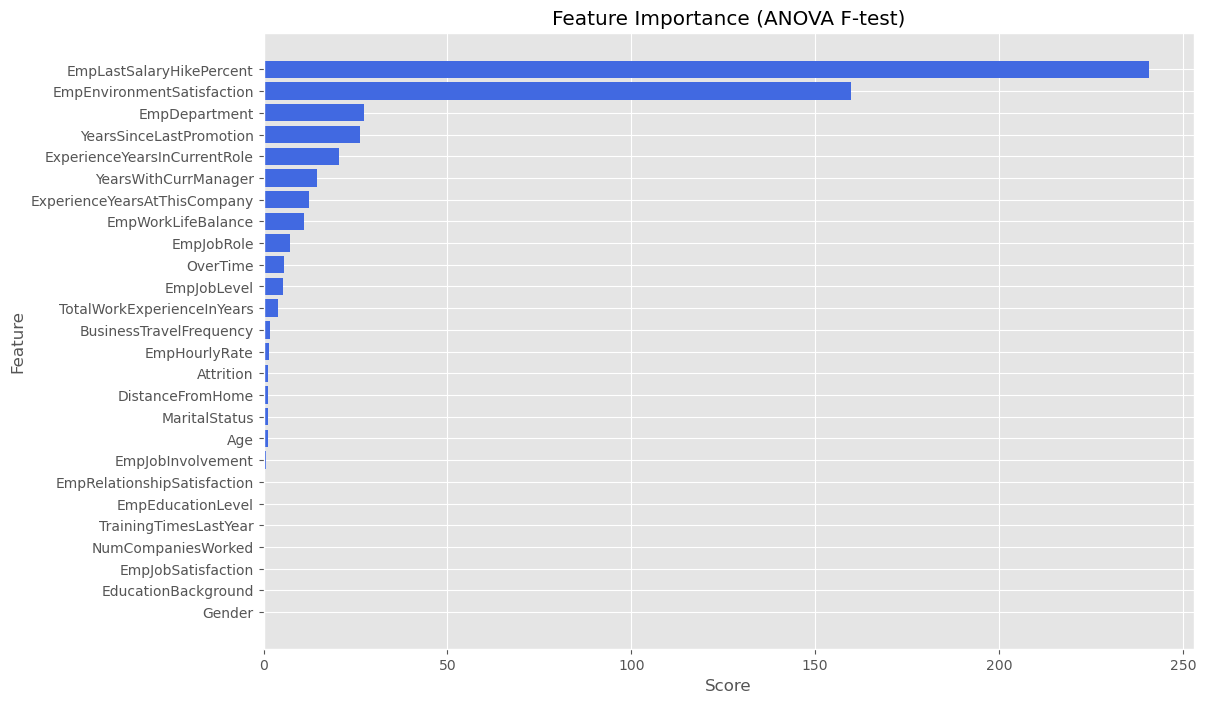

In [27]:
# Plot the feature importances

# Create a new figure with a specified size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot with features on the y-axis and their scores on the x-axis
plt.barh(importance_df['Feature'], importance_df['Score'], color='royalblue')

# Apply the 'ggplot' style for the plot
plt.style.use('ggplot')

# Label the x-axis as 'Score'
plt.xlabel('Score')

# Label the y-axis as 'Feature'
plt.ylabel('Feature')

# Set the title of the plot
plt.title('Feature Importance (ANOVA F-test)')

# Invert the y-axis to have the highest scores at the top
plt.gca().invert_yaxis()

# Save the plot
plt.savefig(os.path.join(save_dir, 'feature_importance_ANOVA.png'))  

# Display the plot
plt.show()


In [28]:
# Select top 8 features
top_features_df = importance_df.head(8)  # Get the top 8 rows of the DataFrame based on feature importance scores
top_features = top_features_df['Feature'].values  # Extract the feature names of the top 8 features


In [29]:
print("Top 8 Selected Features:")
print(top_features_df)

Top 8 Selected Features:
                         Feature       Score
16      EmpLastSalaryHikePercent  240.837433
9     EmpEnvironmentSatisfaction  159.861194
4                  EmpDepartment   27.263331
23       YearsSinceLastPromotion   26.217197
22  ExperienceYearsInCurrentRole   20.505445
24          YearsWithCurrManager   14.641569
21  ExperienceYearsAtThisCompany   12.384997
20            EmpWorkLifeBalance   11.056744


In [30]:
# Considering X is the original feature set

# Subset the original data to include only the top 8 features and the target
X_top_features = X[top_features]  # Select only the columns corresponding to the top 8 features from the original feature set X

# Concatenate the subset of features with the target variable into a single DataFrame
processed_data = pd.concat([X_top_features, y], axis=1)  # Combine X_top_features and y along the columns to create a DataFrame with only top features and the target


In [31]:
# Save the processed data with top features and target to a CSV file
# processed_data.to_csv('../../data/processed/transformed_data_with_target.csv', index=False)  # Used step 5.3 below
# processed_data: DataFrame containing the top 8 features and the target variable.
# 'data/processed/transformed_data_with_target.csv': Path and filename for the output CSV file.
# index=False: Ensures that row indices are not written to the CSV file, keeping only the data.

In [32]:
# Save the top 8 feature names
with open('../../data/processed/trained_feature_names.pkl', 'wb') as f:  # Open a file for writing binary data
    pickle.dump(top_features, f)  # Serialize and write the top_features array to the file

## 5.2 Dimensionality Reduction 
* PCA and Cumulative Variance Plot

In [33]:
# Apply PCA to the top features
pca = PCA()  # Create an instance of PCA (Principal Component Analysis)
X_pca = pca.fit_transform(X_top_features)  # Fit PCA on the selected top features and transform the data

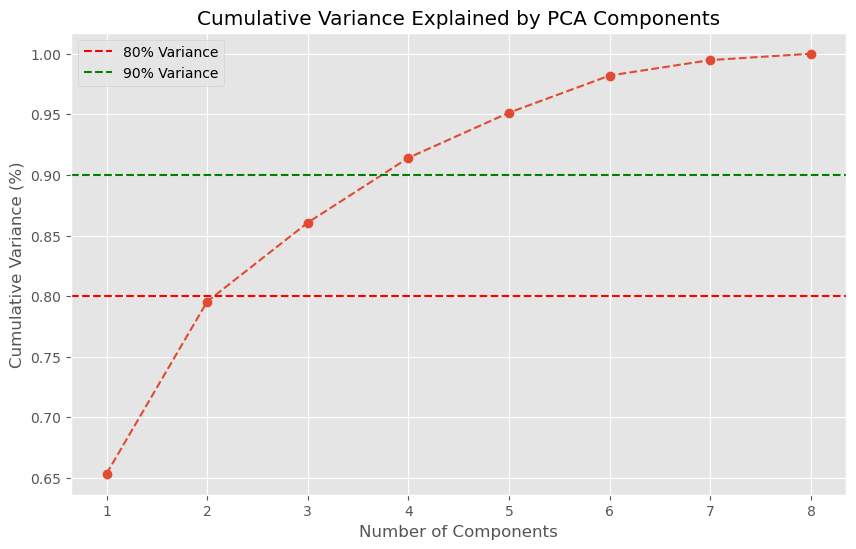

In [34]:
# Cumulative variance plot
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10x6 inches
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
# Plot cumulative variance explained by PCA components
# `range(1, len(pca.explained_variance_ratio_) + 1)`: X-axis values (number of components)
# `pca.explained_variance_ratio_.cumsum()`: Y-axis values (cumulative explained variance ratio)
# `marker='o'`: Mark each point with a circle
# `linestyle='--'`: Use dashed lines to connect the points

plt.title('Cumulative Variance Explained by PCA Components')  # Set the plot title
plt.xlabel('Number of Components')  # Set the label for the X-axis
plt.ylabel('Cumulative Variance (%)')  # Set the label for the Y-axis
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance')  # Add a horizontal line at 80% variance
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')  # Add a horizontal line at 90% variance
plt.grid(True)  # Enable grid for better readability
plt.legend()  # Add a legend to the plot
plt.savefig('../visualization/pca_cumulative_variance.png')  # Save the plot as a PNG file


In [35]:
# Calculate cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

- **`pca.explained_variance_ratio_`**: This attribute of the PCA object contains an array of variance ratios for each principal component. 
   - Each value represents the proportion of the dataset's variance that is captured by each corresponding principal component.
- **`.cumsum()`**: This method computes the cumulative sum of the array values. For the PCA explained variance ratios, this means it calculates the cumulative variance explained by the principal components up to each point. For example, if the first two components explain 40% and 25% of the variance respectively, the cumulative variance explained by the first two components will be 65%.
- **`cumulative_variance`**: The resulting variable stores the cumulative variance explained by the principal components. 
   - It shows how the total explained variance grows as more principal components are included.

In [36]:
# Determine the number of components to reach at least 90% variance
n_components = next(i for i, cumulative_variance in enumerate(cumulative_variance) if cumulative_variance >= 0.80) + 1


- **`enumerate(cumulative_variance)`**: This function generates pairs of index and value from the `cumulative_variance` array. The index represents the component number (starting from 0), and the value represents the cumulative variance explained by that number of components.
    - **`next(i for i, cumulative_variance in enumerate(cumulative_variance) if cumulative_variance >= 0.80)`**: This generator expression iterates over the enumerated `cumulative_variance`. It returns the index `i` where the cumulative variance first reaches or exceeds 0.80 (80%). The `next` function retrieves this index.
    - **`+ 1`**: Since Python uses zero-based indexing (i.e., the first component is index 0), adding 1 adjusts the count to reflect the number of components in a one-based index system.
    - **`n_components`**: This variable holds the number of principal components required to explain at least 90% of the variance in the data. This number is used to reduce the dataset's dimensionality while retaining a high proportion of the variance.

In [37]:
# Print the number of components and variance explained
print(f"Number of components selected to explain at least 80% variance: {n_components}")


Number of components selected to explain at least 80% variance: 3


In [38]:
# Print explained variance ratio for each component

# Print a header for clarity
print("\nExplained variance ratio for each component:")

# Iterate over each component and its explained variance ratio
for i, variance in enumerate(pca.explained_variance_ratio_):
    # Print the component index (1-based) and its variance ratio formatted to four decimal places
    print(f"Component {i+1}: {variance:.4f}")



Explained variance ratio for each component:
Component 1: 0.6535
Component 2: 0.1420
Component 3: 0.0652
Component 4: 0.0535
Component 5: 0.0373
Component 6: 0.0306
Component 7: 0.0127
Component 8: 0.0052


In [39]:
# Print cumulative variance ratio

# Print a header to indicate the following output is about cumulative explained variance ratios
print("\nCumulative explained variance ratio:")

# Iterate over each cumulative variance ratio and its index
for i, variance in enumerate(cumulative_variance):
    # Print the index of the component (starting from 1 for readability) and the cumulative variance ratio up to that component
    print(f"Up to component {i+1}: {variance:.4f}")



Cumulative explained variance ratio:
Up to component 1: 0.6535
Up to component 2: 0.7955
Up to component 3: 0.8607
Up to component 4: 0.9141
Up to component 5: 0.9514
Up to component 6: 0.9820
Up to component 7: 0.9948
Up to component 8: 1.0000


In [40]:
# Reapply PCA with the selected number of components
pca = PCA(n_components=n_components)  # Initialize PCA with the number of components determined
X_pca = pca.fit_transform(X_top_features)  # Apply PCA to the selected features and transform the data


In [41]:
# Save PCA model
with open('../../data/processed/pca_model.pkl', 'wb') as f:  # Open a file in write-binary mode
    pickle.dump(pca, f)  # Serialize and save the PCA model to the file

**`pickle.dump(pca, f)`**:
- **`pickle.dump(pca, f)`**: Serializes the PCA model object (`pca`) and writes it to the file `f`. 
-  This allows you to save the PCA model so that it can be loaded and used later without needing to recompute it.

In [42]:
# Combine PCA components with target variable

# # Create a DataFrame from PCA components with appropriate column names
# transformed_data_with_target = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# # Add the target variable to the DataFrame
# transformed_data_with_target['Target'] = y.values

In [43]:
# # Save the combined data

# # Save the DataFrame containing PCA components and target variable to a CSV file
# transformed_data_with_target.to_csv('../../data/processed/transformed_data_with_target.csv', index=False)

## 5.3 Feature Selection with Correlation Score

In [44]:
# Map metadata to numerical values for relevant columns
metadata_mapping = {
    'Gender': {'Female': 0, 'Male': 1},
    'EducationBackground': {'Marketing': 0, 'Life Sciences':1, 'Human Resources':2,'Medical':3,'Technical Degree':4,'Other':5},
    'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2},
    'EmpDepartment': {'Sales': 0, 'Human Resources': 1, 'Development': 2, 'Data Science': 3, 'Research & Development': 4, 'Finance': 5},
    'EmpJobRole': {'Sales Executive': 0, 'Manager': 1, 'Developer': 2,'Sales Representative': 3, 'Human Resources': 4, 'Senior Developer': 5,
                      'Data Scientist': 6,'Senior Manager R&D': 7, 'Laboratory Technician': 8, 'Manufacturing Director': 9, 'Research Scientist': 10, 
                      'Healthcare Representative': 11, 'Research Director': 12, 'Manager R&D': 13, 'Finance Manager': 14, 'Technical Architect': 15,
                      'Business Analyst': 16, 'Technical Lead': 17, 'Delivery Manager': 18},
    'BusinessTravelFrequency': {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2},
    'OverTime': {'No': 0, 'Yes': 1},
    'Attrition': {'No': 0, 'Yes': 1},
    
    
    
}

# Apply the mapping to convert categorical columns to numerical
for column, mapping in metadata_mapping.items():
    df[column] = df[column].map(mapping)


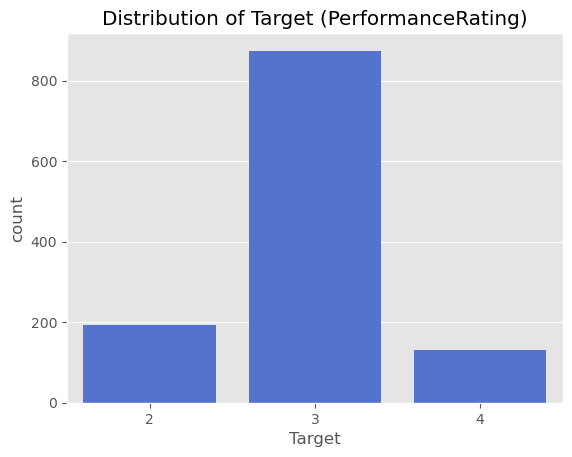

In [45]:
# Confirm the distribution of the target variable 'Target'
sns.countplot(x='Target', data=df, color= 'royalblue')
plt.title('Distribution of Target (PerformanceRating)')
plt.show()

In [46]:
# Assess for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant column to the DataFrame if not already present
X_with_const = add_constant(X)

# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Sort the DataFrame by VIF in descending order
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data_sorted)
# No feature has a VIF value > 10 hence no multicollinearity. Thus, all features can be used in subsequent models to predict the Target variable.

                         Feature         VIF
0                          const  140.106066
19    TotalWorkExperienceInYears    4.775479
22  ExperienceYearsAtThisCompany    4.615166
23  ExperienceYearsInCurrentRole    2.861893
25          YearsWithCurrManager    2.760402
13                   EmpJobLevel    2.729961
1                            Age    2.074312
24       YearsSinceLastPromotion    1.674811
5                  EmpDepartment    1.553665
6                     EmpJobRole    1.517492
15            NumCompaniesWorked    1.274354
26                     Attrition    1.266684
16                      OverTime    1.101656
9              EmpEducationLevel    1.067780
4                  MaritalStatus    1.058385
12             EmpJobInvolvement    1.048796
10    EmpEnvironmentSatisfaction    1.046411
14            EmpJobSatisfaction    1.030492
18   EmpRelationshipSatisfaction    1.028149
21            EmpWorkLifeBalance    1.027678
7        BusinessTravelFrequency    1.025260
11        

In [47]:
# Reorder columns to have 'Target' as the first column
columns = ['Target'] + [col for col in df.columns if col != 'Target']
df_reordered = df[columns]

# Check for the correlation scores

df_reordered.corr()

Target       Age    Gender  \
Target                        1.000000 -0.040164 -0.001780   
Age                          -0.040164  1.000000 -0.040107   
Gender                       -0.001780 -0.040107  1.000000   
EducationBackground           0.032630 -0.073079  0.022009   
MaritalStatus                -0.024172  0.098368  0.042169   
EmpDepartment                 0.023695  0.032231  0.020296   
EmpJobRole                    0.003858  0.025341  0.026363   
BusinessTravelFrequency       0.031025 -0.040579  0.043608   
DistanceFromHome             -0.046142  0.020937 -0.001507   
EmpEducationLevel             0.020529  0.207313 -0.022960   
EmpEnvironmentSatisfaction    0.395561  0.013814  0.000033   
EmpHourlyRate                -0.043116  0.062867  0.002218   
EmpJobInvolvement            -0.010539  0.027216  0.010949   
EmpJobLevel                  -0.076632  0.509139 -0.050685   
EmpJobSatisfaction            0.000606 -0.002436  0.024680   
NumCompaniesWorked            0.020980  0.284408 -0.036675   
OverTime                      0.050206  0.051910 -0.038410   
EmpLastSalaryHikePercent      0.333722 -0.006105 -0.005319   
EmpRelationshipSatisfaction  -0.019502  0.049749  0.030707   
TotalWorkExperienceInYears   -0.068141  0.680886 -0.061055   
TrainingTimesLastYear        -0.005443 -0.016053 -0.057654   
EmpWorkLifeBalance            0.124429 -0.019563  0.015793   
ExperienceYearsAtThisCompany -0.111645  0.318852 -0.030392   
ExperienceYearsInCurrentRole -0.147638  0.217163 -0.031823   
YearsSinceLastPromotion      -0.167629  0.228199 -0.021575   
YearsWithCurrManager         -0.122313  0.205098 -0.036643   
Attrition                    -0.039796 -0.189317  0.035758   

                              EducationBackground  MaritalStatus  \
Target                                   0.032630      -0.024172   
Age                                     -0.073079       0.098368   
Gender                                   0.022009       0.042169   
EducationBackground                      1.000000       0.022935   
MaritalStatus                            0.022935       1.000000   
EmpDepartment                            0.269240       0.042913   
EmpJobRole                               0.184887       0.036401   
BusinessTravelFrequency                  0.015149       0.028520   
DistanceFromHome                        -0.025187       0.019148   
EmpEducationLevel                       -0.054159      -0.026737   
EmpEnvironmentSatisfaction               0.049301       0.032467   
EmpHourlyRate                           -0.046051       0.013540   
EmpJobInvolvement                       -0.003909       0.043355   
EmpJobLevel                             -0.087519       0.087359   
EmpJobSatisfaction                      -0.016389      -0.044593   
NumCompaniesWorked                      -0.021796       0.030095   
OverTime                                 0.015839       0.022833   
EmpLastSalaryHikePercent                 0.002177      -0.010128   
EmpRelationshipSatisfaction             -0.000874      -0.026410   
TotalWorkExperienceInYears              -0.038663       0.093537   
TrainingTimesLastYear                    0.053193      -0.026045   
EmpWorkLifeBalance                       0.016034      -0.014154   
ExperienceYearsAtThisCompany            -0.029215       0.075728   
ExperienceYearsInCurrentRole            -0.026275       0.076663   
YearsSinceLastPromotion                  0.002898       0.052951   
YearsWithCurrManager                    -0.019184       0.061908   
Attrition                               -0.018786      -0.162969   

                              EmpDepartment  EmpJobRole  \
Target                             0.023695    0.003858   
Age                                0.032231    0.025341   
Gender                             0.020296    0.026363   
EducationBackground                0.269240    0.184887   
MaritalStatus                      0.042913    0.036401   
EmpDepartment                      1

In [49]:
# Calculate the correlation matrix with the target
corr_matrix = pd.concat([X, y], axis=1).corr()

# Feature selection using correlation with the target
correlation_threshold = 0.1  # Adjust this threshold based on your needs

# Get features with high correlation to Target
correlated_features = corr_matrix.index[abs(corr_matrix["Target"]) > correlation_threshold]

# Ensure 'Target' is not included in the selected features
if 'Target' in correlated_features:
    correlated_features = correlated_features.drop('Target')

# Selecting features with high correlation to Target
X_selected = X[correlated_features]

print("Selected features:\n", X_selected.columns)

Selected features:
 Index(['EmpDepartment', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [50]:
# Add the target column back to the selected features DataFrame
selected_data = X_selected.copy()
selected_data['Target'] = y

# Save the selected features and target to a CSV file
save_path = '../../data/processed/selecteddata.csv'
selected_data.to_csv(save_path, index=False)

print("Selected features saved to:", save_path)
print("Selected features:\n", X_selected.columns)

Selected features saved to: ../../data/processed/selecteddata.csv
Selected features:
 Index(['EmpDepartment', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
